In [1]:
import pandas as pd
import seaborn as sns # data visualization library  
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt 


pd.set_option('display.max_columns', 50)

seed = 7
np.random.seed(seed)

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train_feature_filename = "dengue_features_train.csv"
train_label_filename = "dengue_labels_train.csv"

test_feature_filename = "dengue_features_test.csv"

train_features = pd.read_csv(train_feature_filename, index_col=[0,2])

train_labels = pd.read_csv(train_label_filename, index_col=[0,2])

In [3]:
train_features.fillna(method='ffill', inplace=True)
train_features['week_start_date'] = pd.to_datetime(train_features['week_start_date']).astype(np.int64) // 10**9

train_features.head()

year  week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
city weekofyear                                                        
sj   18          1990        641433600  0.122600  0.103725  0.198483   
     19          1990        642038400  0.169900  0.142175  0.162357   
     20          1990        642643200  0.032250  0.172967  0.157200   
     21          1990        643248000  0.128633  0.245067  0.227557   
     22          1990        643852800  0.196200  0.262200  0.251200   

                  ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
city weekofyear                                                          
sj   18          0.177617                 12.42             297.572857   
     19          0.155486                 22.82             298.211429   
     20          0.170843                 34.54             298.781429   
     21          0.235886                 15.36             298.987143   
     22          0.247340                  7.52             299.518571   

                 reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
city weekofyear                                                       
sj   18                     297.742857                   292.414286   
     19                     298.442857                   293.951429   
     20                     298.878571                   295.434286   
     21                     299.228571                   295.310000   
     22                     299.664286                   295.821429   

                 reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
city weekofyear                                                         
sj   18                              299.8                      295.9   
     19                              300.9                      296.4   
     20                              300.5                      297.3   
     21                              301.4                      297.0   
     22                              301.9                      297.5   

                 reanalysis_precip_amt_kg_per_m2  \
city weekofyear                                    
sj   18                                    32.00   
     19                                    17.94   
     20                                    26.10   
     21                                    13.90   
     22                                    12.20   

                 reanalysis_relative_humidity_percent  \
city weekofyear                                         
sj   18                                     73.365714   
     19                                     77.368571   
     20                                     82.052857   
     21                                     80.337143   
     22                                     80.460000   

                 reanalysis_sat_precip_amt_mm  \
city weekofyear                                 
sj   18                                 12.42   
     19                                 22.82   
     20                                 34.54   
     21                                 15.36   
     22                                  7.52   

                 reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
city weekofyear                                                             
sj   18                                      14.012857           2.628571   
     19                                      15.372857           2.371429   
     20                                      16.848571           2.300000   
     21                                      16.672857           2.428571   
     22                                      17.210000           3.014286   

                 station_avg_temp_c  station_diur_temp_rng_c  \
city weekofyear                                                
sj   18                   25.442857                 6.900000   
     19                   26.714286                 6.371429   
     20                   26.714286                 6.485714   
     21       

In [4]:
from sklearn.preprocessing import StandardScaler

# Standardizing the data
scaler = StandardScaler()
    

# Seperate data for San Juan
sj_train_features = pd.DataFrame(scaler.fit_transform(train_features.loc['sj']))
sj_train_labels = train_labels.loc['sj']

# Separate data for Iquitos
iq_train_features = pd.DataFrame(scaler.fit_transform(train_features.loc['iq']))
iq_train_labels = train_labels.loc['iq']

sj_train_features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,-1.694458,-1.730015,0.618730,0.406732,0.386803,0.207545,-0.513013,-1.282015,-1.253898,-1.714497,-1.265623,-1.079864,0.045021,-1.538475,-0.513013,-1.624972,0.228762,-1.100409,0.173508,-1.278687,-1.723054,-0.367775
1,-1.694458,-1.726327,1.069847,0.827328,-0.240873,-0.189115,-0.279993,-0.765638,-0.679726,-0.734948,-0.391773,-0.693609,-0.350886,-0.355236,-0.279993,-0.753081,-0.287676,-0.201443,-0.459811,0.059942,-0.261722,-0.620780
2,-1.694458,-1.722639,-0.242970,1.164151,-0.330476,0.086137,-0.017398,-0.304710,-0.322333,0.210006,-0.709537,0.001651,-0.121114,1.029432,-0.017398,0.192993,-0.431131,-0.201443,-0.322877,0.350949,0.136822,0.500648
3,-1.694458,-1.718951,0.676272,1.952837,0.891947,1.251919,-0.447140,-0.138360,-0.035247,0.130805,0.005432,-0.230103,-0.464646,0.522269,-0.447140,0.080343,-0.172912,0.333897,0.019457,0.991163,0.468943,-0.778054
4,-1.694458,-1.715262,1.320680,2.140254,1.302732,1.457218,-0.622801,0.291378,0.322146,0.456714,0.402637,0.156153,-0.512515,0.558586,-0.622801,0.424704,1.003419,1.374273,3.134700,1.980584,0.867488,-0.716512


In [5]:
def preprocess_data(data_path, labels_path=None):
    # select features we want
    features = ['reanalysis_specific_humidity_g_per_kg', 
                 'reanalysis_dew_point_temp_k', 
                 'station_avg_temp_c', 
                 'station_min_temp_c', 'week_start_date', 'precipitation_amt_mm']

    # load data and set index to city, year, weekofyear
    df = pd.read_csv(data_path, index_col=[0, 2]) 

    df = df[features]
    
    for obs in range(1, 5):
#         df["T1_" + str(obs)] = df.reanalysis_dew_point_temp_k.shift(obs)
        df["T2_" + str(obs)] = df.precipitation_amt_mm.shift(obs)
    for obs in range(1, 5):
#         df["T1_" + str(obs)].fillna(0.00, inplace=True)
        df["T2_" + str(obs)].fillna(0.00, inplace=True)
    
    df['week_start_date'] = pd.to_datetime(df['week_start_date'])
    for i in xrange(1,5):
        df['quarter_' + str(i)] = df['week_start_date'].apply(lambda date: 1 if (
            ((i-1)*3<date.to_datetime().month) and (date.to_datetime().month <= i * 3)) else 0)
        features.append('quarter_' + str(i))
    
    df = df.drop(['week_start_date', 'quarter_1', 'quarter_3'], axis=1)
    features.remove('week_start_date')
    
    # fill missing values
    df.fillna(method='ffill', inplace=True)

    
    # Standardizing the data
    scaler = StandardScaler()
    
    sj_label = None
    iq_label = None
    # add labels to dataframe
    if labels_path:
        labels = pd.read_csv(labels_path, index_col=[0, 2])
#         df = df.join(labels)
        sj_label = pd.DataFrame(labels.loc['sj'])
        iq_label = pd.DataFrame(labels.loc['iq'])

    
    # separate san juan and iquitos
    sj = pd.DataFrame(scaler.fit_transform(df.loc['sj']))
    iq = pd.DataFrame(scaler.fit_transform(df.loc['iq']))
#     sj = pd.DataFrame(df.loc['sj'])
#     iq = pd.DataFrame(df.loc['iq'])
    
    
    return sj, iq, sj_label, iq_label

In [6]:
sj_train, iq_train, sj_label, iq_label = preprocess_data(train_feature_filename, labels_path=train_label_filename)

sj_train.head()
# sj_label.shape


/usr/local/lib/python2.7/dist-packages/pandas/core/series.py:2551: FutureWarning: to_datetime is deprecated. Use self.to_pydatetime()
  mapped = lib.map_infer(values, f, convert=convert_dtype)


,0,1,2,3,4,5,6,7,8,9,10
0,-1.624972,-1.714497,-1.100409,-1.723054,-0.513013,-0.789396,-0.789396,-0.788797,-0.788651,1.732051,-0.570771
1,-0.753081,-0.734948,-0.201443,-0.261722,-0.279993,-0.510308,-0.789396,-0.788797,-0.788651,1.732051,-0.570771
2,0.192993,0.210006,-0.201443,0.136822,-0.017398,-0.276611,-0.510308,-0.788797,-0.788651,1.732051,-0.570771
3,0.080343,0.130805,0.333897,0.468943,-0.447140,-0.013252,-0.276611,-0.509777,-0.788651,1.732051,-0.570771
4,0.424704,0.456714,1.374273,0.867488,-0.622801,-0.444244,-0.013252,-0.276136,-0.509650,1.732051,-0.570771


In [7]:
from sklearn.model_selection import train_test_split

sj_train_X, sj_test_X, sj_train_y, sj_test_y = train_test_split(sj_train, sj_label['total_cases'], test_size=0.25, random_state=0, shuffle=False)

iq_train_X, iq_test_X, iq_train_y, iq_test_y = train_test_split(iq_train, iq_label['total_cases'], test_size=0.25, random_state=0, shuffle=False)

sj_train_X.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-1.624972,-1.714497,-1.100409,-1.723054,-0.513013,-0.789396,-0.789396,-0.788797,-0.788651,1.732051,-0.570771
1,-0.753081,-0.734948,-0.201443,-0.261722,-0.279993,-0.510308,-0.789396,-0.788797,-0.788651,1.732051,-0.570771
2,0.192993,0.210006,-0.201443,0.136822,-0.017398,-0.276611,-0.510308,-0.788797,-0.788651,1.732051,-0.570771
3,0.080343,0.130805,0.333897,0.468943,-0.447140,-0.013252,-0.276611,-0.509777,-0.788651,1.732051,-0.570771
4,0.424704,0.456714,1.374273,0.867488,-0.622801,-0.444244,-0.013252,-0.276136,-0.509650,1.732051,-0.570771


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, activation="relu", kernel_initializer="normal")`
  from ipykernel import kernelapp as app


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                384       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________
Train on 702 samples, validate on 234 samples
Epoch 1/200
702/702 [==============================] - 0s 673us/step - loss: 36.2436 - acc: 0.0128 - val_loss: 15.2798 - val_acc: 0.0598
Epoch 2/200
702/702 [==============================] - 0s 328us/step - loss: 25.3287 - ac

Epoch 54/200
702/702 [==============================] - 0s 593us/step - loss: 24.2661 - acc: 0.0271 - val_loss: 16.8566 - val_acc: 0.0085
Epoch 55/200
702/702 [==============================] - 0s 620us/step - loss: 24.2499 - acc: 0.0285 - val_loss: 17.1345 - val_acc: 0.0214
Epoch 56/200
702/702 [==============================] - 0s 548us/step - loss: 24.2809 - acc: 0.0299 - val_loss: 17.8821 - val_acc: 0.0085
Epoch 57/200
702/702 [==============================] - 0s 548us/step - loss: 24.2839 - acc: 0.0328 - val_loss: 16.8468 - val_acc: 0.0171
Epoch 58/200
702/702 [==============================] - 0s 377us/step - loss: 24.2275 - acc: 0.0427 - val_loss: 16.6959 - val_acc: 0.0043
Epoch 59/200
702/702 [==============================] - 0s 393us/step - loss: 24.2369 - acc: 0.0228 - val_loss: 16.6499 - val_acc: 0.0171
Epoch 60/200
702/702 [==============================] - 0s 556us/step - loss: 24.2520 - acc: 0.0328 - val_loss: 17.7165 - val_acc: 0.0043
Epoch 61/200
702/702 [============

702/702 [==============================] - 0s 400us/step - loss: 24.2765 - acc: 0.0199 - val_loss: 16.7114 - val_acc: 0.0256
Epoch 114/200
702/702 [==============================] - 0s 389us/step - loss: 24.2765 - acc: 0.0285 - val_loss: 16.8425 - val_acc: 0.0214
Epoch 115/200
702/702 [==============================] - 0s 340us/step - loss: 24.2578 - acc: 0.0342 - val_loss: 17.0155 - val_acc: 0.0171
Epoch 116/200
702/702 [==============================] - 0s 360us/step - loss: 24.2859 - acc: 0.0399 - val_loss: 17.6059 - val_acc: 0.0171
Epoch 117/200
702/702 [==============================] - 0s 503us/step - loss: 24.2568 - acc: 0.0385 - val_loss: 16.6663 - val_acc: 0.0171
Epoch 118/200
702/702 [==============================] - 0s 454us/step - loss: 24.2306 - acc: 0.0413 - val_loss: 18.2015 - val_acc: 0.0128
Epoch 119/200
702/702 [==============================] - 0s 435us/step - loss: 24.2904 - acc: 0.0171 - val_loss: 17.0149 - val_acc: 0.0171
Epoch 120/200
702/702 [==================

Epoch 172/200
702/702 [==============================] - 0s 457us/step - loss: 24.1940 - acc: 0.0256 - val_loss: 18.0849 - val_acc: 0.0085
Epoch 173/200
702/702 [==============================] - 0s 406us/step - loss: 24.2507 - acc: 0.0256 - val_loss: 16.9019 - val_acc: 0.0128
Epoch 174/200
702/702 [==============================] - 0s 309us/step - loss: 24.2536 - acc: 0.0356 - val_loss: 17.1395 - val_acc: 0.0171
Epoch 175/200
702/702 [==============================] - 0s 355us/step - loss: 24.2233 - acc: 0.0328 - val_loss: 17.6394 - val_acc: 0.0128
Epoch 176/200
702/702 [==============================] - 0s 269us/step - loss: 24.2693 - acc: 0.0299 - val_loss: 16.9272 - val_acc: 0.0214
Epoch 177/200
702/702 [==============================] - 0s 266us/step - loss: 24.2896 - acc: 0.0313 - val_loss: 16.7007 - val_acc: 0.0128
Epoch 178/200
702/702 [==============================] - 0s 273us/step - loss: 24.2586 - acc: 0.0342 - val_loss: 17.1807 - val_acc: 0.0128
Epoch 179/200
702/702 [====

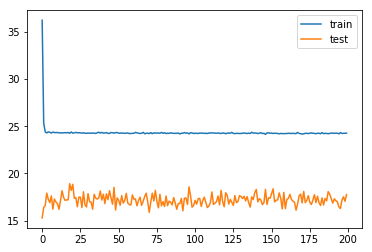

SJ : MAE : 17.757556030892918


In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error


sj_model = Sequential()
sj_model.add(Dense(32, input_dim=sj_train_X.shape[1], kernel_initializer='normal'))
sj_model.add(Dense(16, kernel_initializer='normal'))
sj_model.add(Dense(8, kernel_initializer='normal'))
sj_model.add(Dense(output_dim=1, kernel_initializer='normal', activation='relu'))

sj_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
sj_model.summary()


# ......train..............
hist = sj_model.fit(sj_train_X, sj_train_y.values,
          batch_size=5,
          epochs=200,
          validation_data=(sj_test_X, sj_test_y.values)
            )
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='test')
plt.legend()
plt.show()

sj_pred = sj_model.predict(sj_test_X)
print("SJ : MAE : " + str(mean_absolute_error(sj_test_y, sj_pred)))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 8)                 96        
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 3         
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, activation="relu", kernel_initializer="normal")`
  """


Train on 390 samples, validate on 130 samples
Epoch 1/100
390/390 [==============================] - 0s 570us/step - loss: 141.8328 - acc: 0.2179 - val_loss: 264.4039 - val_acc: 0.0846
Epoch 2/100
390/390 [==============================] - 0s 112us/step - loss: 141.1177 - acc: 0.2179 - val_loss: 262.8769 - val_acc: 0.0846
Epoch 3/100
390/390 [==============================] - 0s 123us/step - loss: 139.5807 - acc: 0.2179 - val_loss: 259.4056 - val_acc: 0.0846
Epoch 4/100
390/390 [==============================] - 0s 112us/step - loss: 136.0588 - acc: 0.2154 - val_loss: 250.7868 - val_acc: 0.1000
Epoch 5/100
390/390 [==============================] - 0s 110us/step - loss: 127.4261 - acc: 0.2000 - val_loss: 233.2597 - val_acc: 0.1000
Epoch 6/100
390/390 [==============================] - 0s 116us/step - loss: 114.3958 - acc: 0.1744 - val_loss: 210.8089 - val_acc: 0.1231
Epoch 7/100
390/390 [==============================] - 0s 111us/step - loss: 102.7339 - acc: 0.1769 - val_loss: 192.7554

390/390 [==============================] - 0s 136us/step - loss: 87.1304 - acc: 0.0769 - val_loss: 160.7399 - val_acc: 0.0308
Epoch 60/100
390/390 [==============================] - 0s 130us/step - loss: 87.2043 - acc: 0.0795 - val_loss: 160.2612 - val_acc: 0.0385
Epoch 61/100
390/390 [==============================] - 0s 117us/step - loss: 87.0946 - acc: 0.0744 - val_loss: 160.0098 - val_acc: 0.0308
Epoch 62/100
390/390 [==============================] - 0s 114us/step - loss: 87.2990 - acc: 0.0821 - val_loss: 160.1672 - val_acc: 0.0308
Epoch 63/100
390/390 [==============================] - 0s 113us/step - loss: 87.2743 - acc: 0.0821 - val_loss: 159.9530 - val_acc: 0.0308
Epoch 64/100
390/390 [==============================] - 0s 114us/step - loss: 87.3527 - acc: 0.0769 - val_loss: 160.6970 - val_acc: 0.0308
Epoch 65/100
390/390 [==============================] - 0s 124us/step - loss: 87.2199 - acc: 0.0769 - val_loss: 159.7548 - val_acc: 0.0385
Epoch 66/100
390/390 [==================

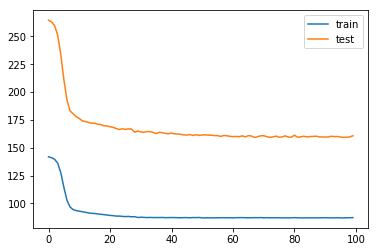

IQ : MAE : 7.746153846153846


In [9]:
iq_model = Sequential()
iq_model.add(Dense(8, input_dim=iq_train_X.shape[1], kernel_initializer='normal'))
iq_model.add(Dense(4, kernel_initializer='normal'))
iq_model.add(Dense(2, kernel_initializer='normal'))
iq_model.add(Dense(output_dim=1, kernel_initializer='normal', activation='relu'))

iq_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
iq_model.summary()

hist = iq_model.fit(iq_train_X, iq_train_y.values,
          batch_size=10,
          epochs=100,
          validation_data=(iq_test_X, iq_test_y.values)
            )
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='test')
plt.legend()
plt.show()

iq_pred = iq_model.predict(iq_test_X).astype(int)
print("IQ : MAE : " + str(mean_absolute_error(iq_test_y, iq_pred)))

In [10]:
import math
sj_pred_X, iq_pred_X, c, d = preprocess_data(test_feature_filename)

sj_pred_submit = sj_model.predict(sj_pred_X)
iq_pred_submit = iq_model.predict(iq_pred_X)

sj_predictions = np.array([int(round(x[0])) for x in sj_pred_submit])
iq_predictions = np.array([int(round(x[0])) for x in iq_pred_submit])

# sj_predictions.shape
# iq_predictions.shape


submission = pd.read_csv('submission_format.csv', index_col=[0, 1, 2])

submission.total_cases = np.concatenate([sj_predictions, iq_predictions])

submission.to_csv("submission_new_nn.csv")

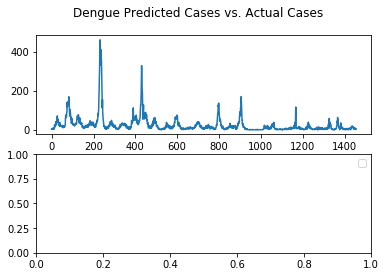

Comparison : MAE : 8.076923076923077


In [20]:
from sklearn.metrics import mean_absolute_error
benchmark = pd.read_csv('submission_vibodha_24.44.csv')
submission = pd.read_csv('submission_new_nn.csv')

train = pd.read_csv(train_label_filename)

figs, axes = plt.subplots(nrows=2, ncols=1)

# benchmark.total_cases.plot(ax=axes[0], label="Predictions")
# submission.total_cases.plot(ax=axes[0], label="Actual")
train.total_cases.plot(ax=axes[0], label="Train")
    
plt.suptitle("Dengue Predicted Cases vs. Actual Cases")
plt.legend()

plt.show()

print("Comparison : MAE : " + str(mean_absolute_error(benchmark.total_cases, submission.total_cases)))